# Iman Kianian - 3rd Assignment of Machine Learning course - Fall 2021

In [290]:
import warnings
warnings.filterwarnings('ignore')

#### import Necessary packages

In [291]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Part 1

#### define variables

In [293]:
C0 = np.array([[0,-1],[1,0],[2,1]])
C1 = np.array([[1,1],[-1,1],[-1,-1],[-1,-1]])
#C0 = np.array([[4,1],[2,4],[2,3],[3,6],[4,4]])
#C1 = np.array([[9,10],[6,8],[9,5],[8,7],[10,8]])
#C0 = np.array([[4,2],[2,4],[2,3],[3,6],[4,4]])
#C1 = np.array([[9,10],[6,8],[9,5],[8,7],[10,8]])

#### Plot data

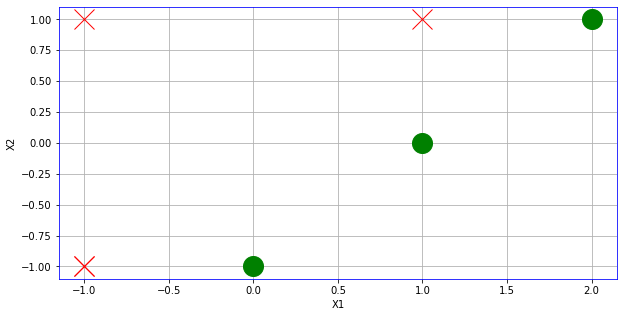

In [294]:
fig = plt.figure(figsize=(10,5))
plt.rc('axes', facecolor='w', edgecolor='b',axisbelow=True, grid=True)
plt.xlabel("X1")
plt.ylabel("X2")
for i in range(C0.shape[0]):
    plt.plot(C0[i,0], C0[i,1], marker="o", markersize=20, color="green")
for i in range(C1.shape[0]): 
    plt.plot(C1[i,0], C1[i,1], marker="x", markersize=20, color="red")

plt.show()

#### Calculate Mean for each class

In [295]:
mean1 = np.array([[np.mean(C0[:,0])],[np.mean(C0[:,1])]])
mean2 = np.array([[np.mean(C1[:,0])],[np.mean(C1[:,1])]])
print(mean1.T,mean2.T,sep='\t')

[[1. 0.]]	[[-0.5  0. ]]


#### Plot mean + Plot data

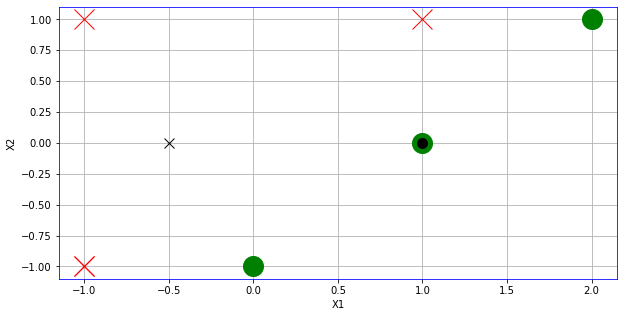

In [296]:
fig = plt.figure(figsize=(10,5))
plt.rc('axes', facecolor='w', edgecolor='b',axisbelow=True, grid=True)
plt.xlabel("X1")
plt.ylabel("X2")
for i in range(C0.shape[0]):
    plt.plot(C0[i,0], C0[i,1], marker="o", markersize=20, color="green")
for i in range(C1.shape[0]): 
    plt.plot(C1[i,0], C1[i,1], marker="x", markersize=20, color="red")
    
plt.plot(mean1[0], mean1[1], marker="o", markersize=10, color="black")
plt.plot(mean2[0], mean2[1], marker="x", markersize=10, color="black")
plt.show()

#### Calculate S1 , S2

In [297]:
# Calculate S1
temp = np.zeros((C0.shape[1],C0.shape[1]))
for i in range(C0.shape[0]):
    test = (np.subtract(C0[i].reshape((2,1)),mean1))
    temp = temp + (np.dot(test,test.T))
S1 = temp

# Claculate S2
temp = np.zeros((C1.shape[1],C1.shape[1]))
for i in range(C1.shape[0]):
    test = (np.subtract(C1[i].reshape((2,1)),mean2))
    temp = temp + (np.dot(test,test.T))
S2 = temp

In [298]:
S1

array([[2., 2.],
       [2., 2.]])

In [299]:
S2

array([[3., 2.],
       [2., 4.]])

#### Calculate S_w

In [300]:
SW = S1+S2
print(SW)

[[5. 4.]
 [4. 6.]]


#### Calculate S_b

In [301]:
temp = np.subtract(mean1,mean2)
SB = np.dot(temp,temp.T)
print(SB)

[[2.25 0.  ]
 [0.   0.  ]]


#### Calculate W

In [302]:
temp = np.subtract(mean1,mean2)
W = np.dot(np.linalg.inv(SW),temp)
W

array([[ 0.64285714],
       [-0.42857143]])

#### Plot LDA with the points and their projections

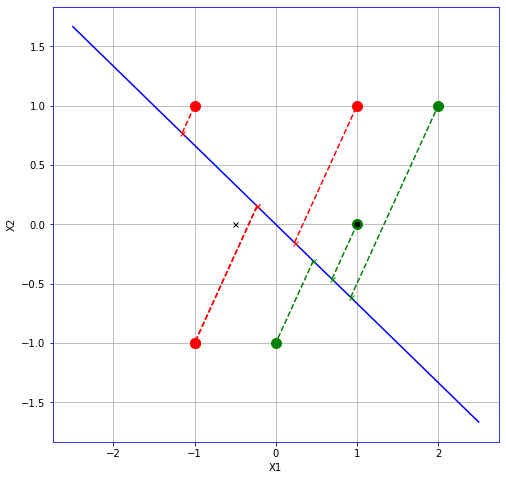

In [303]:
fig = plt.figure(figsize=(8,8))
plt.rc('axes', facecolor='w', edgecolor='b',axisbelow=True, grid=True)
x1 = [-2.5,2.5]
m = W[1]/W[0]
x2 = m*x1
plt.plot(x1, x2, 'b-')
plt.xlabel("X1")
plt.ylabel("X2")
for i in range(C0.shape[0]):
    plt.plot(C0[i,0], C0[i,1], marker="o", markersize=10, color="green")
for i in range(C1.shape[0]): 
    plt.plot(C1[i,0], C1[i,1], marker="o", markersize=10, color="red")
    

for i in range(C0.shape[0]):
    X = (C0[i,1] + ((1/m) * C0[i,0]) - 0)/ (m+(1/m))
    plt.plot(X, m*X, marker="x", markersize=5, color="green")
    plt.plot([X,C0[i,0]], (-1/m)*[X,C0[i,0]]+ C0[i,1]+(1/m)*C0[i,0], 'g--')
    
for i in range(C1.shape[0]): 
    X = (C1[i,1] + ((1/m) * C1[i,0]) - 0)/ (m+(1/m))
    plt.plot(X, m*X, marker="x", markersize=5, color="red")
    plt.plot([X,C1[i,0]], (-1/m)*[X,C1[i,0]]+ C1[i,1]+(1/m)*C1[i,0], 'r--')
    
plt.plot(mean1[0], mean1[1], marker="o", markersize=5, color="black")
plt.plot(mean2[0], mean2[1], marker="x", markersize=5, color="black")
plt.show()

#### Calculate W^T . X

In [304]:
C0W = np.dot(C0,W)
C1W = np.dot(C1,W)

#### Draw New Data

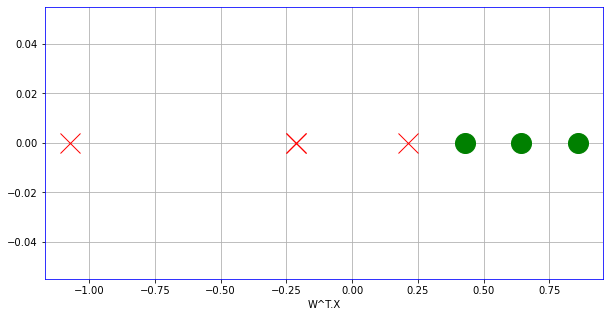

In [305]:
fig = plt.figure(figsize=(10,5))
plt.rc('axes', facecolor='w', edgecolor='b',axisbelow=True, grid=True)
plt.xlabel("W^T.X")
plt.ylabel("")
for i in range(C0W.shape[0]):
    plt.plot(C0W[i], 0, marker="o", markersize=20, color="green")
for i in range(C1W.shape[0]): 
    plt.plot(C1W[i], 0, marker="x", markersize=20, color="red")
    

plt.show()

## Part 2

#### Load Data

In [306]:
Train_DS = pd.read_csv (r'train.csv')   #read the csv file
Test_DS = pd.read_csv (r'test.csv')

#### Standardize Data

In [307]:
df_x = Train_DS[['feature1', 'feature2']]
Train_mean = df_x.mean()
Train_std = df_x.std()
Train_DS[['feature1', 'feature2']] = (df_x-Train_mean)/Train_std

df_x = Test_DS[['feature1', 'feature2']]
Test_DS[['feature1', 'feature2']] = (df_x-Train_mean)/Train_std

In [308]:
x1_train = Train_DS['feature1'].to_numpy().reshape(4000,1)
x2_train = Train_DS['feature2'].to_numpy().reshape(4000,1)
x_train = np.reshape((np.concatenate((x1_train, x2_train), axis=0)),(2,-1)).T

y_train = Train_DS['label'].to_numpy().reshape(4000,1)

x1_test = Test_DS['feature1'].to_numpy().reshape(1000,1)
x2_test = Test_DS['feature2'].to_numpy().reshape(1000,1)
x_test = np.reshape((np.concatenate((x1_test,x2_test),axis=0)),(2,-1)).T

y_test = Test_DS['label'].to_numpy().reshape(1000,1)

#### Plot Training Set (Green = Fake , Red = Original)


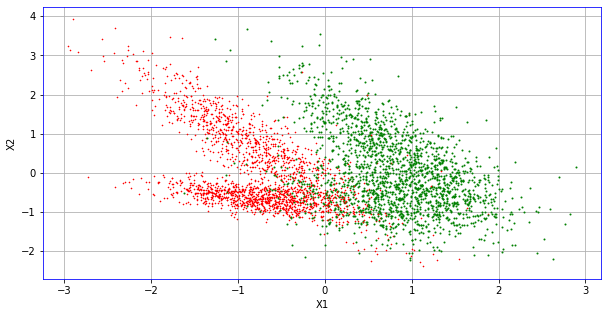

In [309]:
fig = plt.figure(figsize=(10,5))
plt.xlabel("X1")
plt.ylabel("X2")
for i in range(y_train.shape[0]):
    if y_train[i] == 1:
        plt.plot(x1_train[i], x2_train[i], marker="o", markersize=1, color="green")
    else:
        plt.plot(x1_train[i], x2_train[i], marker="x", markersize=1, color="red")

plt.show()

#### Draw Test Set (Green = Fake , Red = Original)

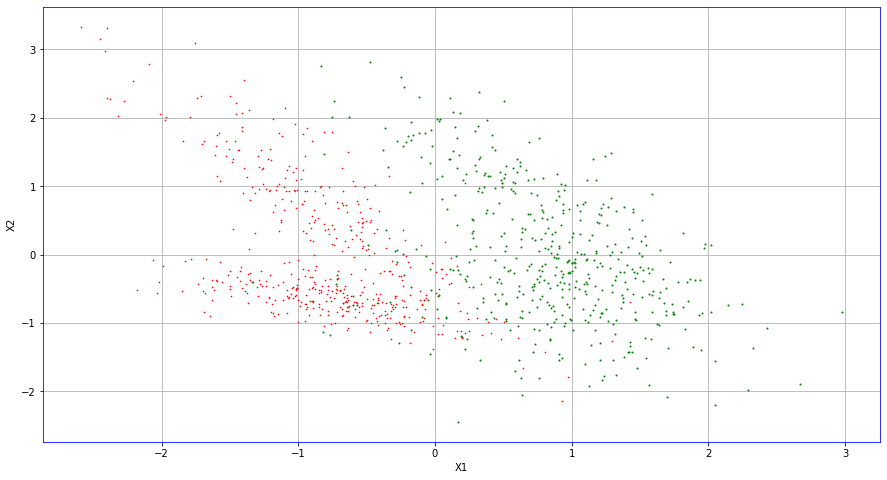

In [310]:
fig = plt.figure(figsize=(15,8))
plt.xlabel("X1")
plt.ylabel("X2")

for i in range(y_test.shape[0]):
    
    if y_test[i] == 1:
        plt.plot(x1_test[i], x2_test[i], marker="o", markersize=1, color="green")
    else:
        plt.plot(x1_test[i], x2_test[i], marker="x", markersize=1, color="red")
plt.show()

### Classify With Perceptron

In [311]:
def sign_function(x):
    return 1.0 if x > 0  else 0.0

In [312]:
def Preprocess(X):
    """
       Add a column of 1 indexes to our data.
    """
    Ones = (np.ones((X.shape[0],1)))
    return np.append(Ones, X, axis=1)

In [313]:
def perceptron(*,X,Y,epochs,lr=1e-3):
    """
    X =  Training Data
    Y = Training Labels
    lr = Learning Rate ( Default = 0.001 )
    epochs = Number of Iterations
    """
    X = Preprocess(X)
    W = np.random.rand(X.shape[1],1) # Random W -- Initialize
    MinW = np.zeros((X.shape[1],1))
    Minindex = 0
    
    
    n = X.shape[0] # Number of Training Instances
    m = X.shape[1] # Number of Features
    MisclassifiedHist = [] # History of Misclassified instances during epochs
    for i in range(epochs):
        NOMis = 0   # Count number of Misclassified per each iteration
        for index,instance in enumerate(X): # loop for instances
            y_predict = sign_function(np.dot(instance,W))
            instance= instance.reshape((X.shape[1],1))
            if y_predict != Y[index][0]:
                NOMis +=1
                W = W + lr*(float((Y[index][0] - y_predict))*instance) # if Y(n) = -1 then 
                
        if i == 0:
            MinW = W
        elif MisclassifiedHist[Minindex] > NOMis:
            MinW = W
            Minindex = i
        MisclassifiedHist.append(NOMis)
        
    return MisclassifiedHist, MinW

In [314]:
MisClassifiedHist , W  = perceptron(X=x_train,Y=y_train,epochs=1000)

In [315]:
def MisClass(X,W,Y):
    X = Preprocess(X)
    MisClassfies = []
    for index,instance in enumerate(X): # loop for instances
        y_predict = sign_function(np.dot(instance,W))
        instance= instance.reshape((X.shape[1],1))
        if y_predict!=Y[index][0]:
            MisClassfies.append('Yes')
        else:
            MisClassfies.append('No')
    return MisClassfies

In [316]:
def PlotWithLine(X, W, Y,Error = "Bold"):
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -W[1]/W[2]
    c = -W[0]/W[2]
    x2 = m*x1 + c
    
    fig = plt.figure(figsize=(15,8))
    plt.plot(x1, x2, 'b-')
    
    x1 = X[:,0]
    x2 = X[:,1]
    Misclassifies = MisClass(X,W,Y)
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            if(Misclassifies[i] == 'Yes' and Error == "Bold"):
                plt.plot(x1[i], x2[i], marker="o", markersize=5, color="green")
            else:
                plt.plot(x1[i], x2[i], marker="o", markersize=1, color="green")
        else:
            if(Misclassifies[i] == 'Yes' and Error == "Bold"):
                plt.plot(x1[i], x2[i], marker="x", markersize=5, color="red")
            else:
                plt.plot(x1[i], x2[i], marker="x", markersize=1, color="red")
    plt.xlabel("X1")
    plt.ylabel("X2")

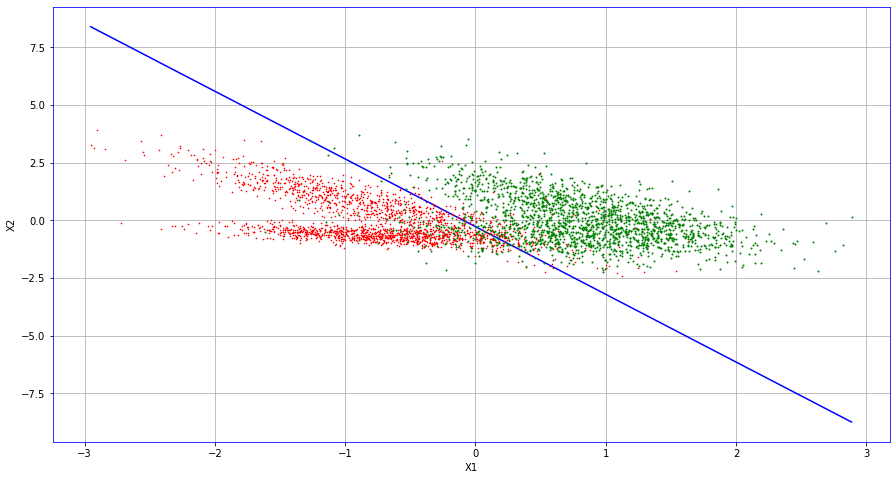

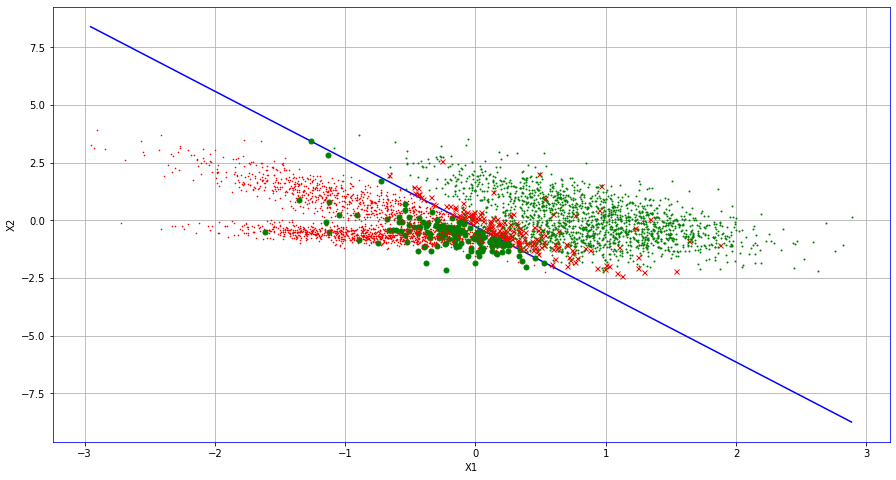

In [317]:
PlotWithLine(x_train,W,y_train,'notbold')
PlotWithLine(x_train,W,y_train)

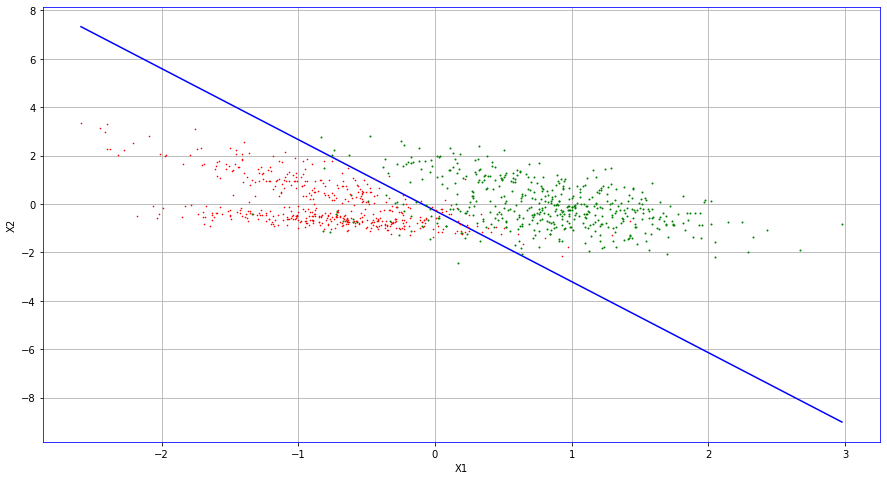

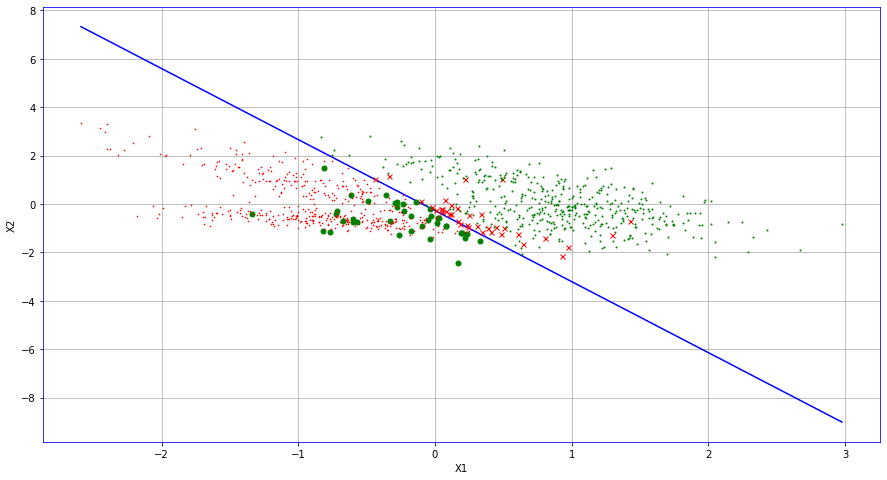

In [318]:
PlotWithLine(x_test,W,y_test,'nobold')
PlotWithLine(x_test,W,y_test)

In [319]:
def CalculateError(X,Y,W):
    FN = FP = TN = TP = 0
    X = Preprocess(X)
    for index,instance in enumerate(X): # loop for instances
        y_predict = sign_function(np.dot(instance,W))
        instance= instance.reshape((X.shape[1],1))
        if y_predict!=Y[index][0]:
            if float((Y[index][0] - y_predict)) == 1.0:
                FN += 1
            elif float((Y[index][0] - y_predict)) == - 1.0:
                FP += 1
        elif Y[index]== 0.0:
            TN += 1
        else:
            TP +=1
    return TN, TP, FN, FP

#### Accuracy without applying LDA to data

In [320]:
TrainErrors = CalculateError(x_train,y_train,W)
print(TrainErrors)
print("Accuracy: ", (TrainErrors[0]+TrainErrors[1])/x_train.shape[0])
print("Number of Misclassified Data: ", (TrainErrors[2]+TrainErrors[3]))

(1832, 1839, 154, 175)
Accuracy:  0.91775
Number of Misclassified Data:  329


In [321]:
TestErrors = CalculateError(x_test,y_test,W)
print(TestErrors) 
print("Accuracy: ", (TestErrors[0]+TestErrors[1])/x_test.shape[0])
print("Number of Misclassified Data: ", (TestErrors[2]+TestErrors[3]))

(467, 458, 39, 36)
Accuracy:  0.925
Number of Misclassified Data:  75


### Apply LDA to data

#### Split data to 2 parts

In [322]:
C0 = Train_DS.loc[Train_DS['label']==0.0][['feature1', 'feature2']]
C0_Test = Test_DS.loc[Test_DS['label']==0.0][['feature1', 'feature2']]

In [323]:
C1 = Train_DS.loc[Train_DS['label']==1.0][['feature1', 'feature2']]
C1_Test = Test_DS.loc[Test_DS['label']==1.0][['feature1', 'feature2']]

In [324]:
C0 = C0.to_numpy()
C0_Test = C0_Test.to_numpy()
C1 = C1.to_numpy()
C1_Test = C1_Test.to_numpy()

#### Calculate Mean for each class

In [325]:
mean1 = np.array([[np.mean(C0[:,0])],[np.mean(C0[:,1])]])
mean2 = np.array([[np.mean(C1[:,0])],[np.mean(C1[:,1])]])
print(mean1.T,mean2.T,sep='\t')

[[-0.77490499  0.01779583]]	[[ 0.78034838 -0.01792084]]


#### Calculate S1 , S2

In [326]:
# Calculate S1
temp = np.zeros((C0.shape[1],C0.shape[1]))
for i in range(C0.shape[0]):
    test = (np.subtract(C0[i].reshape((2,1)),mean1))
    temp = temp + (np.dot(test,test.T))
S1 = temp

# Claculate S2
temp = np.zeros((C1.shape[1],C1.shape[1]))
for i in range(C1.shape[0]):
    test = (np.subtract(C1[i].reshape((2,1)),mean2))
    temp = temp + (np.dot(test,test.T))
S2 = temp

#### Calculate S_w

In [327]:
SW = S1+S2
SW

array([[ 1580.21657161, -1234.72815039],
       [-1234.72815039,  3997.72433503]])

#### Calculate S_b

In [328]:
temp = np.subtract(mean1,mean2)
SB = np.dot(temp,temp.T)
SB

array([[ 2.41881306e+00, -5.55484732e-02],
       [-5.55484732e-02,  1.27568059e-03]])

#### Calculate W

In [329]:
temp = np.subtract(mean1,mean2)
W = np.dot(np.linalg.inv(SW),temp)
W

array([[-0.00128807],
       [-0.0003889 ]])

#### Calculate Eigen vectors and eigen values

In [337]:
w, v = np.linalg.eig(np.dot(np.linalg.inv(SW),SB))

#### Get the eigen vector corresponds largest eigen value

In [338]:
W = v[np.argmax(w)].reshape(w.shape[0],1)

In [339]:
P1 = np.dot(C0,W)  # W^T X
P2 = np.dot(C1,W)  # W^T X
P1_test = np.dot(C0_Test,W)  # W^T X
P2_test = np.dot(C1_Test,W)  # W^T X

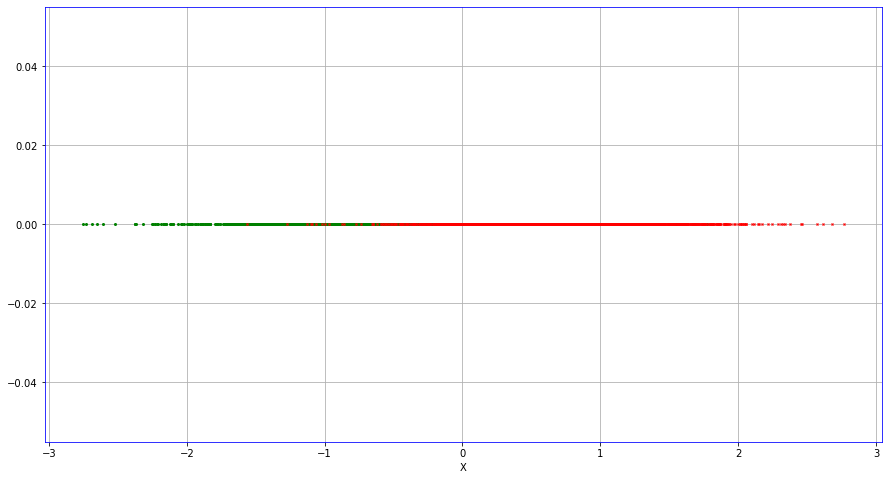

In [340]:
fig = plt.figure(figsize=(15,8))
plt.rc('axes', facecolor='w', edgecolor='b',axisbelow=True, grid=True)
plt.xlabel("X")
plt.ylabel("")
for i in range(P1.shape[0]):
    plt.plot(P1[i], 0, marker="o", markersize=2, color="green")
for i in range(P2.shape[0]): 
    plt.plot(P2[i], 0, marker="x", markersize=2, color="red")
    

plt.show()

#### train data after applying LDA with perceptron

In [341]:
x_train = np.concatenate((P1,P2))
y_train = (np.concatenate((np.zeros((P1.shape[0])),np.ones((P2.shape[0]))))).reshape(P1.shape[0]+P2.shape[0],1)

In [342]:
MisClassifiedHist , Wclass  = perceptron(X=x_train,Y=y_train,epochs=1000)

#### Accuracy on Training data

In [343]:
count = 0 
for i in range(x_train.shape[0]):
    if sign_function(Wclass[1]*x_train[i])==y_train[i]:
        count+=1
print('Accuracy: ', count/x_train.shape[0])
print('# of misclassified data : ', x_train.shape[0]-count )

Accuracy:  0.89825
# of misclassified data :  407


#### Draw Points  for training data

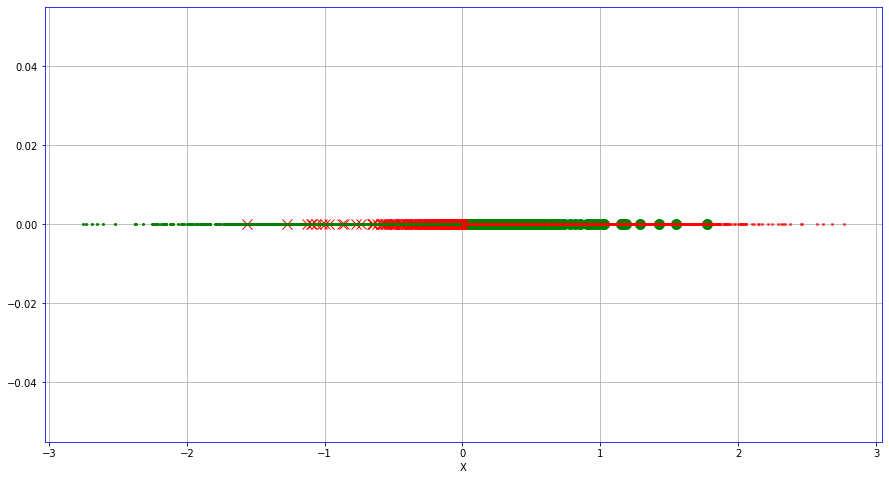

In [253]:
fig = plt.figure(figsize=(15,8))
plt.rc('axes', facecolor='w', edgecolor='b',axisbelow=True, grid=True)
plt.xlabel("X")
plt.ylabel("")
for i in range(x_train.shape[0]):
    if sign_function(Wclass[1]*x_train[i])==y_train[i]:
        if y_train[i] == 0.0:
            plt.plot(x_train[i], 0, marker="o", markersize=2, color="green",zorder=5)
        elif y_train[i] == 1.0:
            plt.plot(x_train[i], 0, marker="x", markersize=2, color="red",zorder=5)
    else:
        if y_train[i] == 0.0:
            plt.plot(x_train[i], 0, marker="o", markersize=10, color="green",zorder=2)
        elif y_train[i] == 1.0:
            plt.plot(x_train[i], 0, marker="x", markersize=10, color="red",zorder=2)

plt.show()

#### evaluate test data after applying LDA with perceptron

In [254]:
x_test = np.concatenate((P1_test,P2_test))
y_test = (np.concatenate((np.zeros((P1_test.shape[0])),np.ones((P2_test.shape[0]))))).reshape(P1_test.shape[0]+P2_test.shape[0],1)

In [255]:
count = 0 
for i in range(x_test.shape[0]):
    if sign_function((Wclass[1]*x_test[i])[0])==y_test[i]:
        count+=1
print('Accuracy: ', count/x_test.shape[0])
print('# of misclassified data : ', x_test.shape[0]-count )

Accuracy:  0.904
# of misclassified data :  96


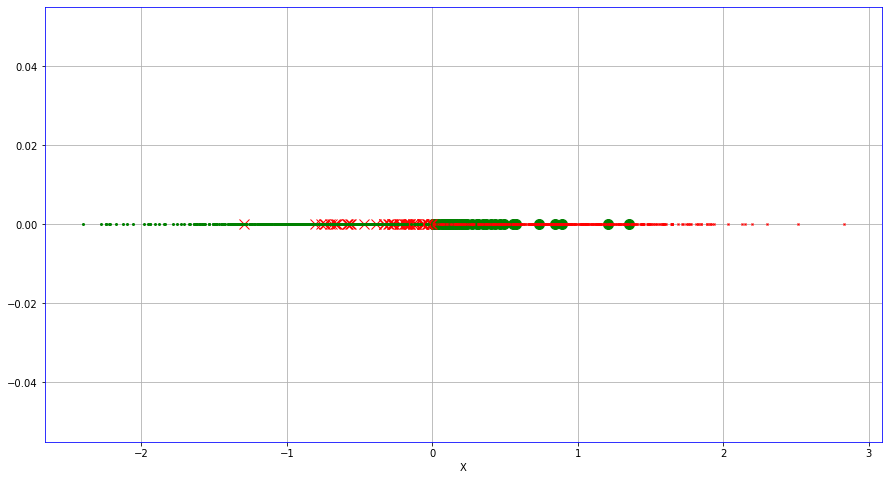

In [256]:
fig = plt.figure(figsize=(15,8))
plt.rc('axes', facecolor='w', edgecolor='b',axisbelow=True, grid=True)
plt.xlabel("X")
plt.ylabel("")
for i in range(x_test.shape[0]):
    if sign_function((Wclass[1]*x_test[i])[0])==y_test[i]:
        if y_test[i] == 0.0:
            plt.plot(x_test[i], 0, marker="o", markersize=2, color="green",zorder=5)
        elif y_test[i] == 1.0:
            plt.plot(x_test[i], 0, marker="x", markersize=2, color="red",zorder=5)
    else:
        if y_test[i] == 0.0:
            plt.plot(x_test[i], 0, marker="o", markersize=10, color="green",zorder=2)
        elif y_test[i] == 1.0:
            plt.plot(x_test[i], 0, marker="x", markersize=10, color="red",zorder=2)

plt.show()

# END.